## Image - Processing : Blurring

### 모듈 불러오기

In [14]:
import pandas as pd 
import numpy as np 
import cv2 
import sys 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline 
from PIL import Image 

Text(0.5, 1.0, 'add_gamma_up')

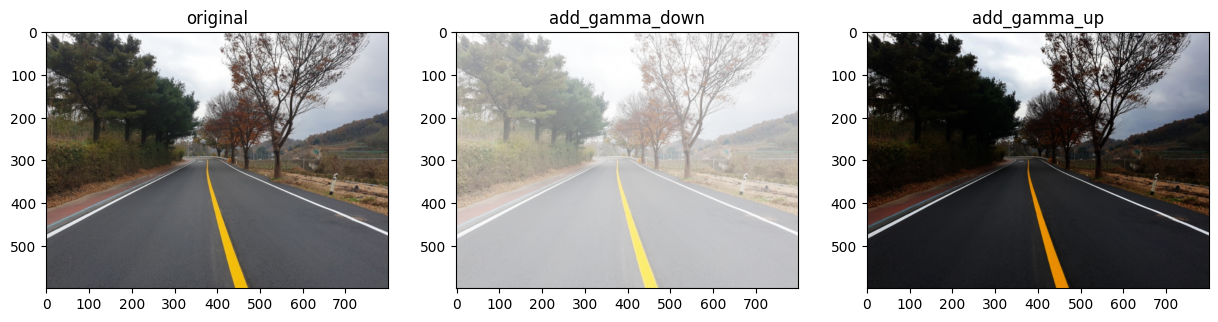

In [2]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,600))
    return img

plt.figure(figsize = (15,12))

fig = plt.subplot(1, 3, 1)
ori = load_img()
plt.imshow(ori)
plt.title('original')

fig = plt.subplot(1, 3, 2)
pic = load_img()
gamma = 1/4
result = np.power(pic, gamma)
plt.imshow(result)
plt.title('add_gamma_down')

fig = plt.subplot(1, 3, 3)
pi = load_img()
gamma = 2
result = np.power(pi, gamma)
plt.imshow(result)
plt.title('add_gamma_up')

    

Text(0.5, 1.0, 'bilateral Filter')

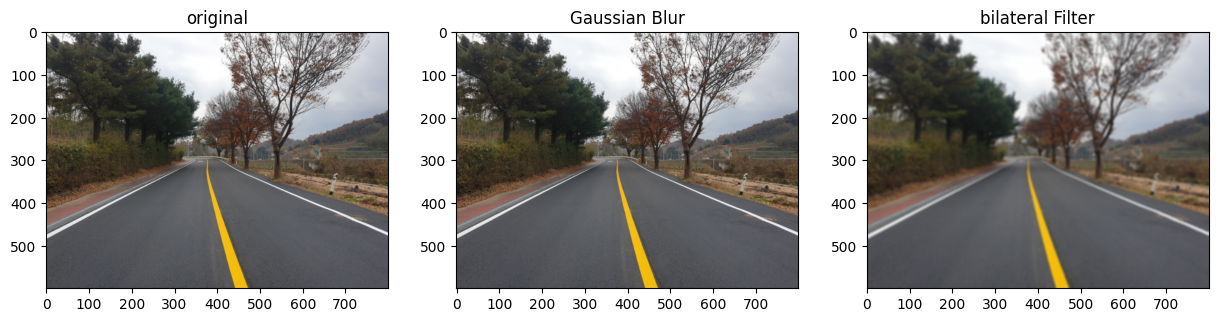

In [3]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (800,600))
    return img

plt.figure(figsize = (15,12))

fig = plt.subplot(1, 3, 1)
ori = load_img()
plt.imshow(ori)
plt.title('original')

fig = plt.subplot(1, 3, 2)
pic = load_img()
blurred_gaus = cv2.GaussianBlur(src = pic, ksize=(9,9), sigmaX=10)
plt.imshow(pic)
plt.title('Gaussian Blur')

fig = plt.subplot(1, 3, 3)
pi = load_img()
blur = cv2.bilateralFilter(pi,9,75,75)
plt.imshow(blur)
plt.title('bilateral Filter')

    

### 잡음 제거 -- cv2.medianBlur

In [4]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    sys.exit()

dst = cv2.medianBlur(src,3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kkyu/venv/opencv/lib/python3.10/site-packages/cv2/qt/plugins"


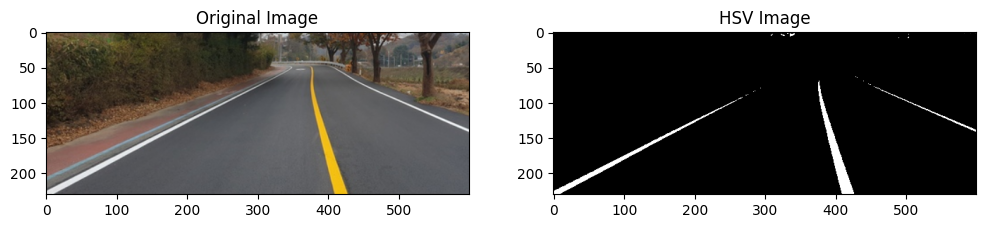

In [5]:
def load_img():
    img = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg', cv2.IMREAD_COLOR)
    img = cv2.resize(img, (800,600))
    ROI = img[250:480, 0:600]
    
    HSV = cv2.cvtColor(ROI, cv2.COLOR_BGR2HSV)
    
    lower_white = np.array([0, 0, 200], dtype=np.uint8) 
    upper_white = np.array([180, 255, 255], dtype=np.uint8) 
    white_mask = cv2.inRange(HSV, lower_white, upper_white) 

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(white_mask, connectivity=8)
    
    return ROI, white_mask


ROI, white_mask = load_img()

plt.figure(figsize = (12,10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(white_mask, cmap='gray')
plt.title('HSV Image')

plt.show()



### 이미지에서 특정 영역 추출하기

In [10]:
image = cv2.imread('/home/kkyu/amr_ws/opencv/data/road.jpg')

x = 100
y = 100
width = 200
height = 200

# 이미지에서 영역 추출 
cropped_image = image[y:y+height, x:x+width]

# cv2.imwrite('cropped_image.jpg', cropped_image)  -> 추출된 영역 이미지 저장 
cv2.imshow('cropped_image,', cropped_image)

cv2.waitKey()
cv2.destroyAllWindows()

### 라인 검출 알고리즘 

- 이미지 전처리: 주로 그레이스케일 변환, 가우시안 블러 적용, 캐니 에지 검출 등의 과정을 거칩니다. 이를 통해 이미지를 노이즈가 적고 경계가 강조된 에지 이미지로 변환합니다.
- ROI(Region of Interest) 설정: 관심 영역을 지정하여 이미지의 일부 영역만 처리합니다. 일반적으로 도로의 차선을 검출하기 위해 아래쪽의 영역을 선택합니다.
- 허프 변환(Hough Transform): 에지 이미지에서 적절한 파라미터로 선을 검출하는 허프 변환을 수행합니다. 이를 통해 직선 형태의 라인을 검출할 수 있습니다.
- 선분 합치기: 허프 변환을 통해 검출된 선분들을 연결하여 하나의 라인으로 만들어 줍니다.
- 시각화: 검출된 라인을 원본 이미지에 시각화합니다.

In [13]:
def detect_lines(image):
    # 이미지 전처리
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # ROI 설정
    height, width = image.shape[:2]
    roi_vertices = [(0, height), (width/2, height/2), (width, height)]
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    # 허프 변환
    lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

    # 선분 합치기 및 시각화
    line_image = np.zeros_like(image)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)

    # 원본 이미지와 검출된 라인 이미지 합성
    result = cv2.addWeighted(image, 1, line_image, 0.8, 0)

    return result

# 이미지 읽어오기
image = cv2.imread('/home/kkyu/amr_ws/opencv/data/road2.jpeg')

# 라인 검출 함수 호출
result = detect_lines(image)

# 결과 이미지 출력
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### cv2.canny()
- OpenCV에서 제공되어 있는 edge 검출 함수
- 이미지의 edge만 되돌려준다 
-  간단히는 threshold1와 threshold2 어느쪽도 엣지 여부의 판단하는 임계값을 나타내고 있다. 클수록 엣지가 검출되기 어렵고, 작을 수록 엣지가 검출되기 쉽다

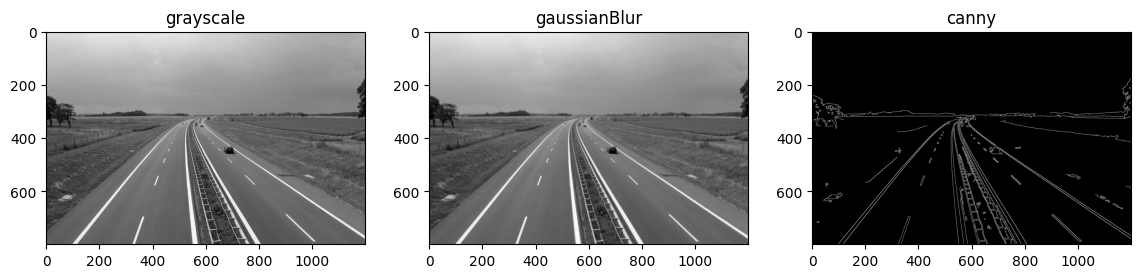

In [21]:
img = mpimg.imread('/home/kkyu/amr_ws/opencv/data/road2.jpeg')

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussianBlur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

gray = grayscale(img)

kernel_size = 5
blur_gray = gaussianBlur(gray, kernel_size)

low_threshold = 50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize = (14,12))

plt.subplot(1,3,1)
plt.imshow(gray, cmap ='gray')
plt.title('grayscale')

plt.subplot(1,3,2)
plt.imshow(blur_gray, cmap = 'gray')
plt.title('gaussianBlur')

plt.subplot(1,3,3)
plt.imshow(edges, cmap = 'gray')
plt.title('canny')

plt.show()



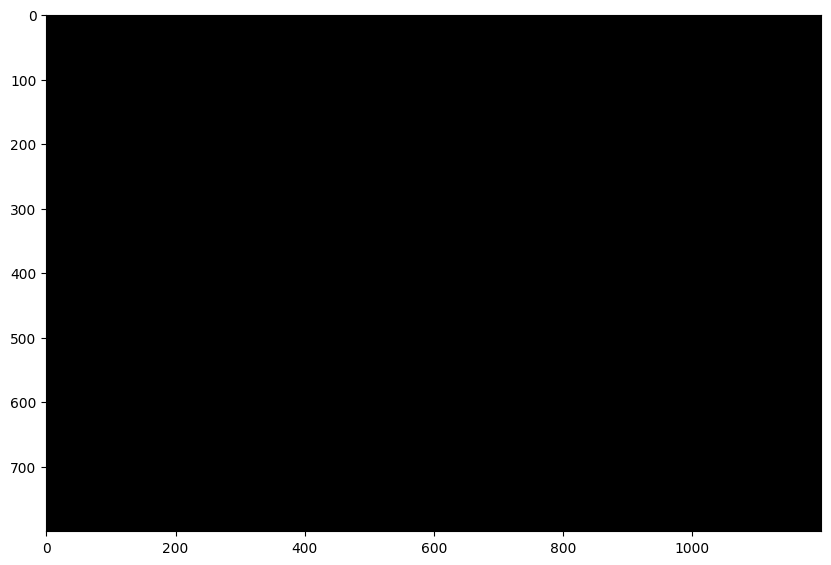

In [22]:
mask = np.zeros_like(img)

plt.figure(figsize = (10,8))
plt.imshow(mask, cmap = 'gray')
plt.show()

In [29]:
img.shape

(800, 1200, 3)

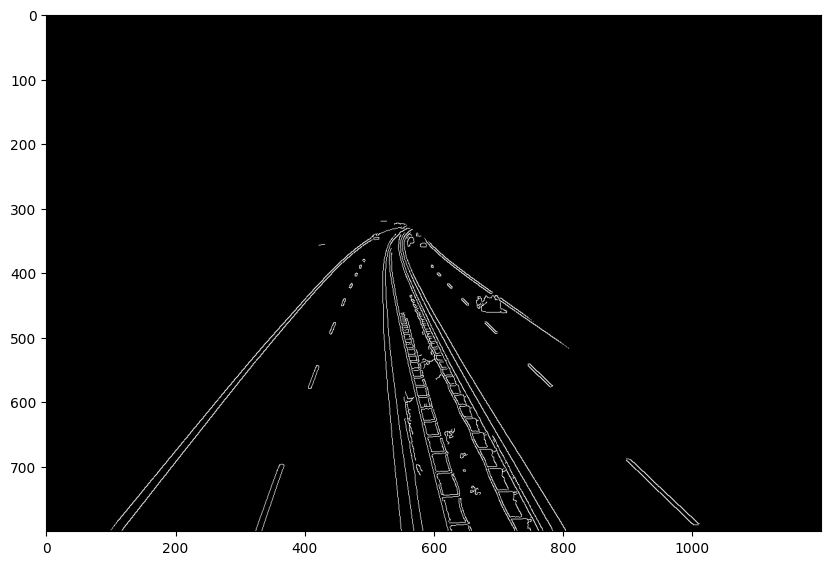

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_of_interest(img, vertices):
    # 검은색 바탕의 이미지 생성 
    mask = np.zeros_like(img)
    
    # 여기서 img.shape[2]는 이미지의 차원 중 세 번째 차원으로, 컬러 이미지의 경우 색상 채널의 수를 나타낸다
    # 흑백 이미지인 경우에는 단일 값을 가지게 되어 (255,)가 된다
    # 즉 이 부분은 입력 이미지가 흑백 이미지인지, 컬러 이미지인지에 따라 마스크에 사용할 색을 설정하는 부분
    if len(img.shape) > 2:
        # 이미지가 컬러 이미지인 경우
        channel_out = img.shape[2]
        ignore_mask_color = (255,) * channel_out
    else:
        # 이미지가 흑백 이미지인 경우
        ignore_mask_color = 255
    
    # 다각형 내부를 특정 색으로 채우기
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    # 이미지와 마스크를 비트 AND 연산하여 마스크 적용
    masked_image = cv2.bitwise_and(img, mask) # mask 영역에서 서로 공통으로 겹치는 부분 출력
    return masked_image

# 이미지의 형태(shape) 가져오기
imshape = img.shape

# 관심 영역의 꼭짓점 설정
vertices = np.array([[(100, imshape[0]),
                      (450, 320),
                      (550, 320),
                      (imshape[1] - 20, imshape[0])]], dtype=np.int32)

# 관심 영역 적용
mask = region_of_interest(edges, vertices)

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap='gray')
plt.show()
